In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import warnings
import keras
warnings.filterwarnings("ignore")

In [12]:
train_data_dir = '/home/dhruv/Downloads/mnist-jpg/train'
test_data_dir = '/home/dhruv/Downloads/mnist-jpg/test'

# Image data generator for training data
train_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Image data generator for testing data
test_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Create data generators
train_batch_size = 10000
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),  # Resize images to 28x28
    batch_size=train_batch_size,
    class_mode='categorical', 
     color_mode='grayscale',# Use 'categorical' for one-hot encoded labels
    shuffle=True,
)

# Load test data without labels (class_mode=None)
test_batch_size = 2000
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(28, 28),  # Resize images to 28x28
    batch_size=test_batch_size,
    class_mode='categorical',  # Use 'categorical' for one-hot encoded labels
      color_mode='grayscale',
    shuffle=True,
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [13]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))

Epoch 1/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.4902 - loss: 1.7542 - val_accuracy: 0.8350 - val_loss: 0.8234
Epoch 2/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8277 - loss: 0.7438 - val_accuracy: 0.8660 - val_loss: 0.5639
Epoch 3/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8602 - loss: 0.5448 - val_accuracy: 0.8830 - val_loss: 0.4723
Epoch 4/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8771 - loss: 0.4660 - val_accuracy: 0.8885 - val_loss: 0.4258
Epoch 5/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8827 - loss: 0.4226 - val_accuracy: 0.8980 - val_loss: 0.3950
Epoch 6/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8965 - loss: 0.3811 - val_accuracy: 0.9025 - val_loss: 0.3735
Epoch 7/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8975 - loss: 0.3769 - val_accuracy: 0.9030 - val_loss: 0.3610
Epoch 8/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9031 - loss: 0.3458 - val_accuracy: 0.

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9055 - loss: 0.3422
Loss:  0.34793543815612793
Accuracy:  0.9070000052452087


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Actual Number:  6
Predicted Number:  6


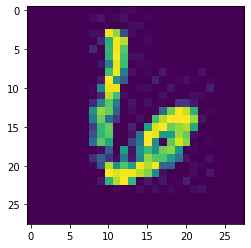

In [17]:
n = 20 
plt.imshow(x_test[n])
predicted_value = model.predict(x_test)
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))

In [18]:
history = history.history
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

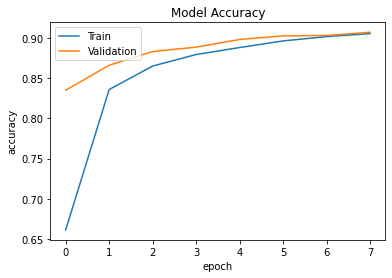

In [19]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', "Validation"], loc='upper left')

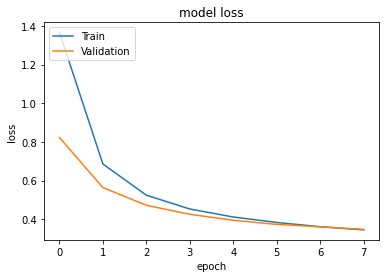

In [20]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

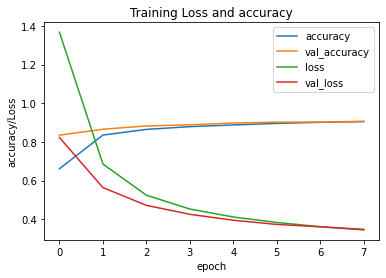

In [21]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])